# Visualisation of 30 second Trip segmens

In this notebook the 30 second trip segments are visualized via TSNE.

**Note:** Here we did not calculate any distance measure. Only the euclidean norm of the x,y,z accelerometer sensor was computed. 

In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
from dotenv import load_dotenv, find_dotenv

import pandas as pd
#Visualisation Libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

%aimport visualization.visualize
from visualization.visualize import get_color_encoding
%aimport data.download
from data.download import DatasetDownloader

In [2]:
file_path = os.path.join(os.path.abspath(DatasetDownloader.get_data_dir()),"preprocessed","preprocessed_data_total.csv")

trip_segments = pd.read_csv(file_path, sep=";")

In [3]:
trips_only = trip_segments.drop(["mode","notes","scripted","token", "trip_id"],axis=1)
trips_only.head(5)

,snippet_0,snippet_1,snippet_2,snippet_3,snippet_4,snippet_5,snippet_6,snippet_7,snippet_8,snippet_9,...,snippet_590,snippet_591,snippet_592,snippet_593,snippet_594,snippet_595,snippet_596,snippet_597,snippet_598,snippet_599
0,9.278493,9.296665,9.303951,9.282634,9.259105,9.258111,9.302163,9.274589,9.312668,9.307446,...,9.552687,9.642124,9.543089,9.605530,9.513530,9.592095,9.525473,9.592914,9.551294,9.557359
1,9.587396,9.572002,9.557191,9.570629,9.610838,9.565827,9.643101,9.598879,9.619234,9.560224,...,9.257471,9.277821,9.466250,9.385377,9.505895,9.466447,9.404861,9.332328,9.301059,9.219414
2,9.301911,9.274540,9.311304,9.408004,9.393961,9.506595,9.332275,9.512083,9.345652,9.511601,...,9.467231,9.492408,9.471855,9.466397,9.475256,9.443595,9.446208,9.488025,9.470100,9.478707
3,9.447703,9.493467,9.467504,9.484678,9.448774,9.453100,9.440604,9.448695,9.456445,9.505641,...,9.775658,9.779088,9.707967,9.646070,9.662463,9.585848,9.653326,9.639528,9.678194,9.670269
4,9.661645,9.648159,9.531404,9.612666,9.633840,9.635739,9.752913,9.842806,9.877066,9.779705,...,9.400684,9.465776,9.462665,9.520878,9.539786,9.556364,9.527692,9.534078,9.489410,9.442796


## Visualise trip segments with TSNE
We can see from the plots that without calculating the distance metrics, we can see no real structure in the data set

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
trips_reduced = pd.DataFrame(pca.fit_transform(trips_only))

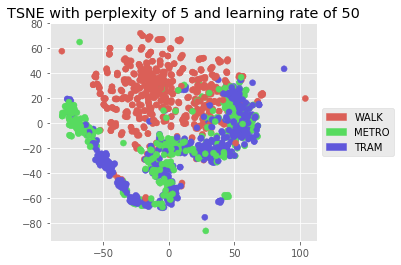

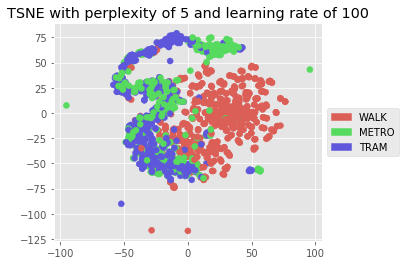

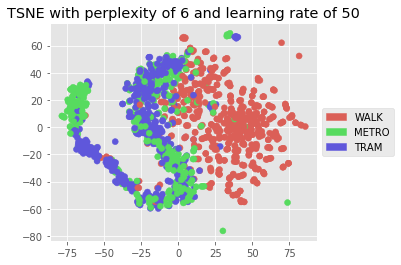

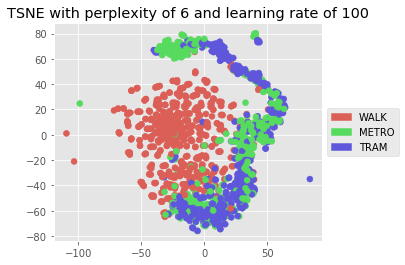

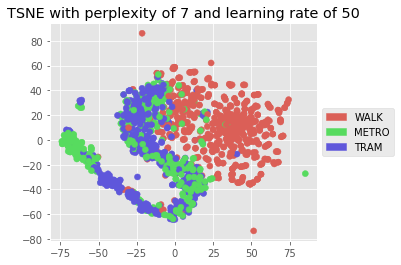

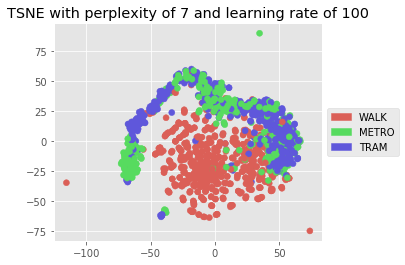

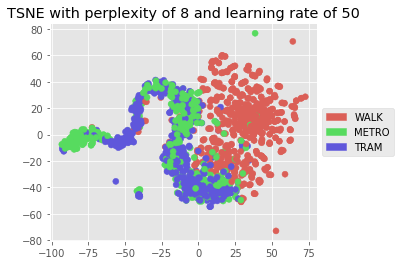

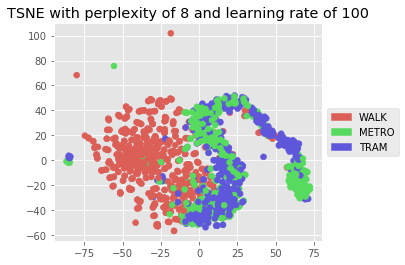

In [5]:
from sklearn.manifold import TSNE

learning_rate = [50, 100]
for perplexity_i in range(5,9):
    for learning_rate_i in learning_rate:
        fig,ax = plt.subplots()
        colors, color_patches = get_color_encoding(trip_segments["mode"])
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        # Put a legend to the right of the current axis
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
                  handles=color_patches)
        tsne = TSNE(learning_rate=learning_rate_i, perplexity=perplexity_i).fit_transform(trips_reduced)
        ax.set_title("TSNE with perplexity of {} and learning rate of {}".format(perplexity_i,learning_rate_i))
        ax.scatter(tsne[:, 0], tsne[:, 1], c=colors)
plt.show();